In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tr = pd.read_parquet('data/train.parquet')
tst = pd.read_parquet('data/test.parquet')

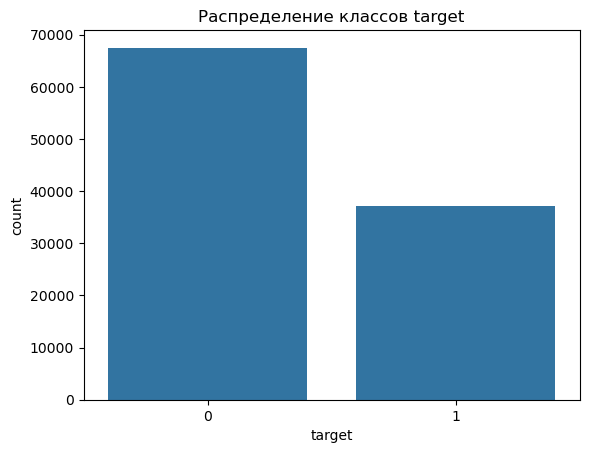

In [3]:
sns.countplot(data=tr, x='target')
plt.title('Распределение классов target')
plt.show()

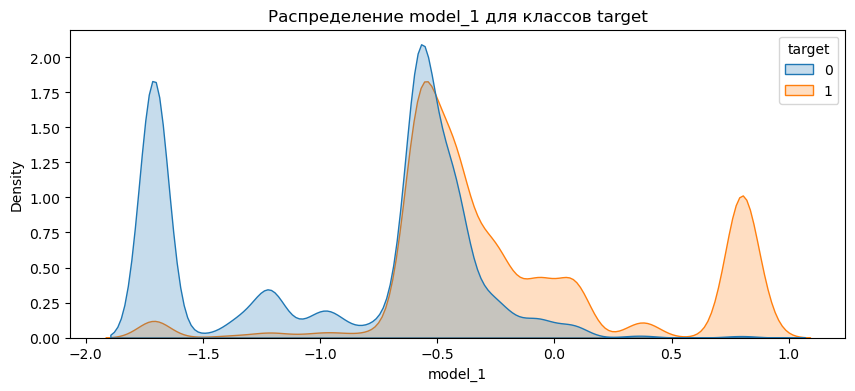

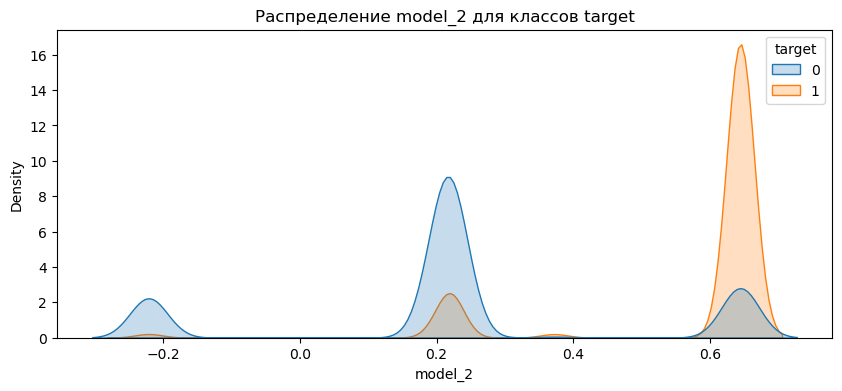

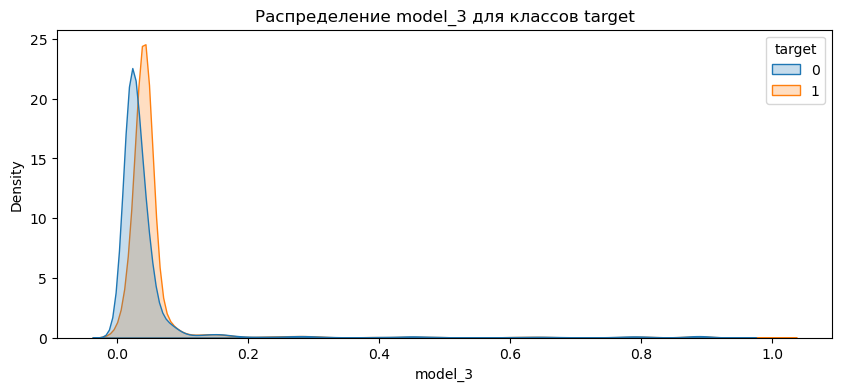

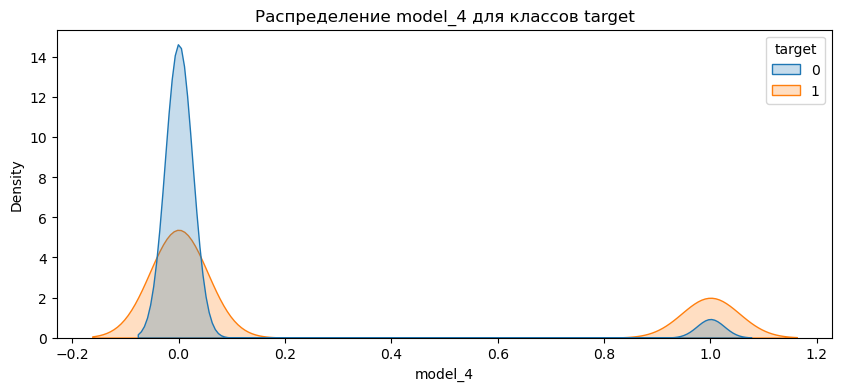

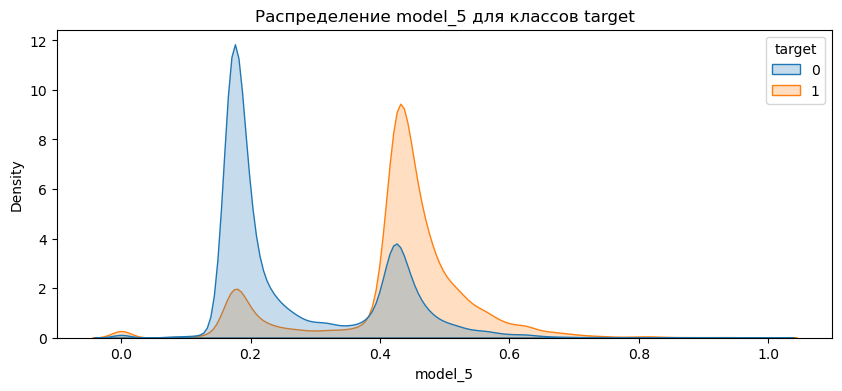

In [4]:
for model in ['model_1', 'model_2', 'model_3', 'model_4', 'model_5']:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=tr, x=model, hue='target', fill=True, common_norm=False)
    plt.title(f'Распределение {model} для классов target')
    plt.show()

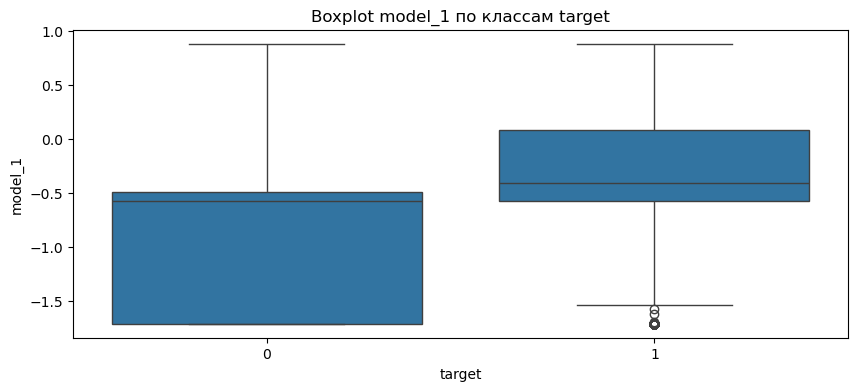

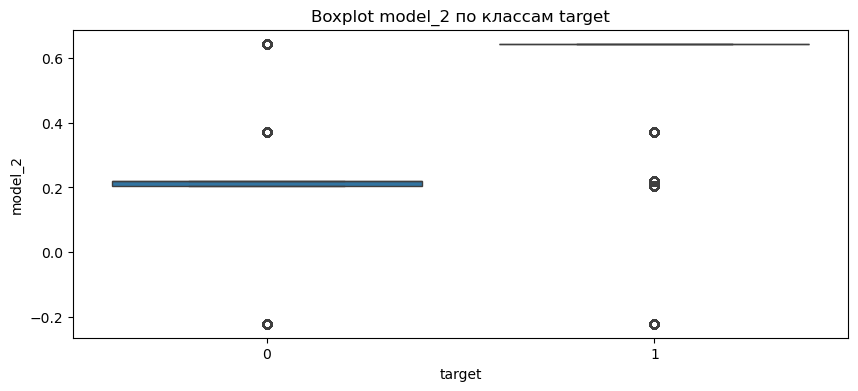

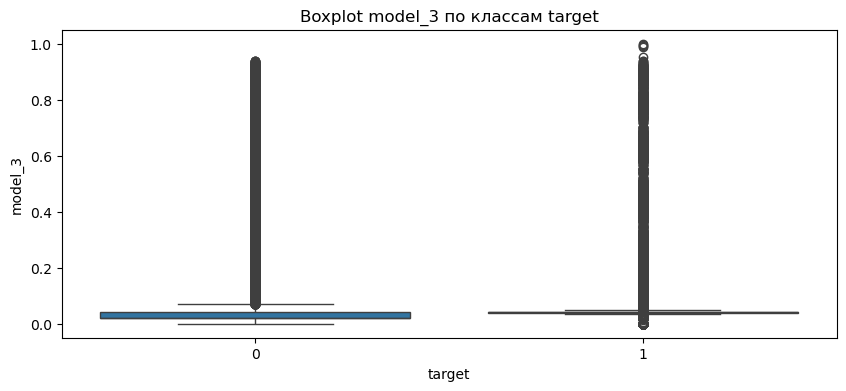

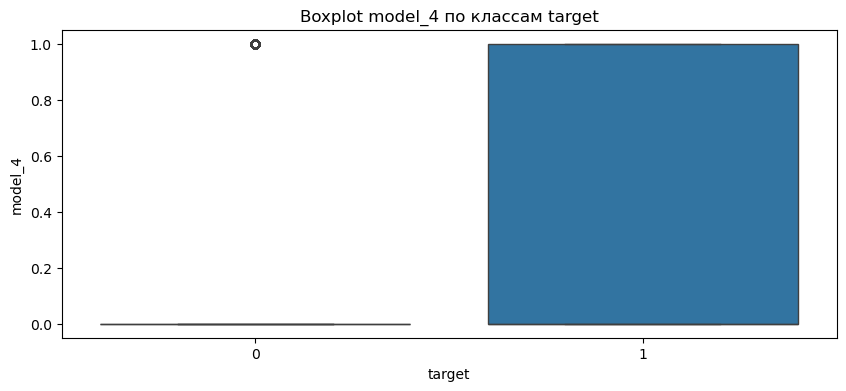

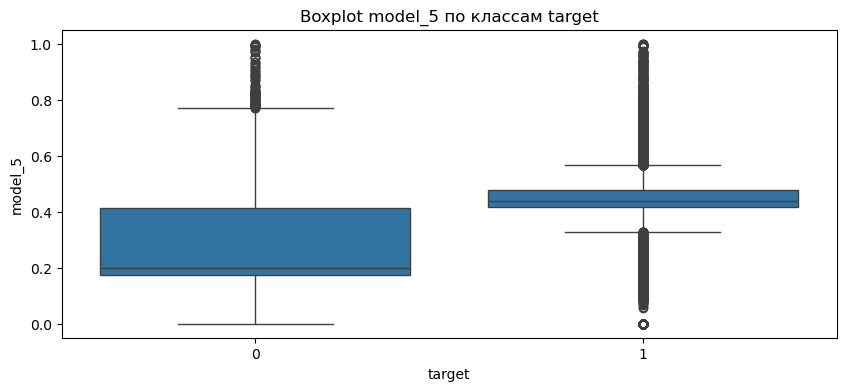

In [5]:
for model in ['model_1', 'model_2', 'model_3', 'model_4', 'model_5']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=tr, x='target', y=model)
    plt.title(f'Boxplot {model} по классам target')
    plt.show()

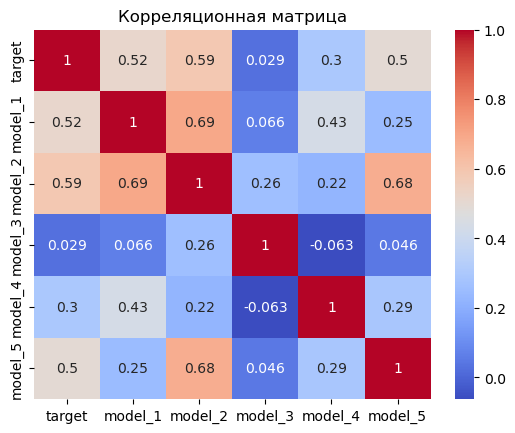

In [6]:
corr = tr[['target', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [7]:
tr['comb'] = np.where(tr['model_1'] > 0.9, tr['model_1'], tr['model_2'])

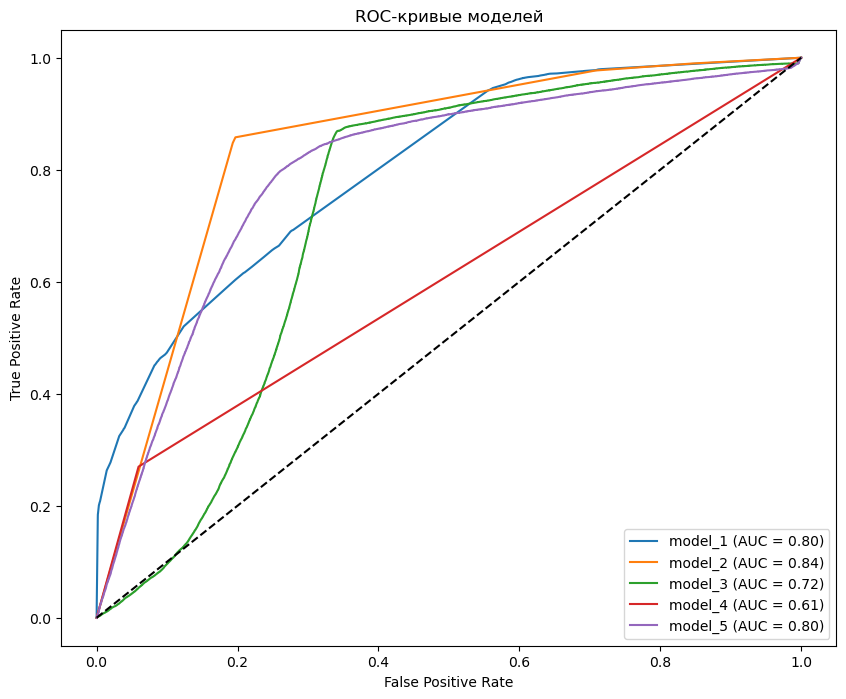

In [8]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model in ['model_1', 'model_2', 'model_3', 'model_4', 'model_5']:
    fpr, tpr, _ = roc_curve(tr['target'], tr[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей')
plt.legend()
plt.show()

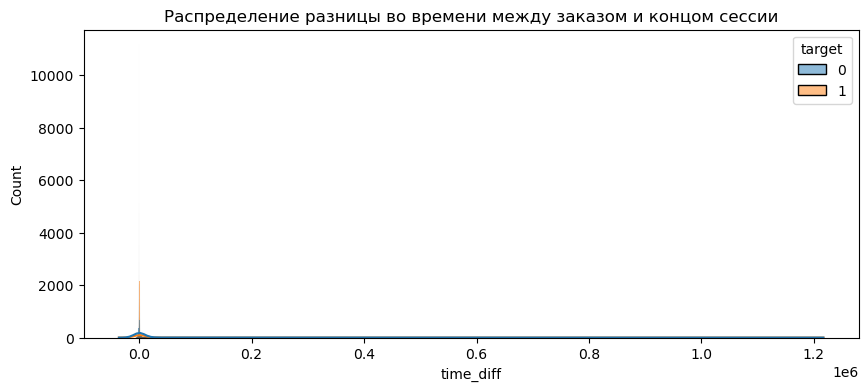

In [9]:
# Конвертация времени
tr['order_create_time'] = pd.to_datetime(tr['order_create_time'])
tr['session_end_time'] = pd.to_datetime(tr['session_end_time'])

# Разница во времени
tr['time_diff'] = (tr['order_create_time'] - tr['session_end_time']).dt.total_seconds()

# График разницы
plt.figure(figsize=(10, 4))
sns.histplot(data=tr, x='time_diff', hue='target', kde=True)
plt.title('Распределение разницы во времени между заказом и концом сессии')
plt.show()

In [10]:
tr['model_2'].unique()

array([ 0.64480529,  0.22008143, -0.22154122,  0.20318263,  0.37217059])

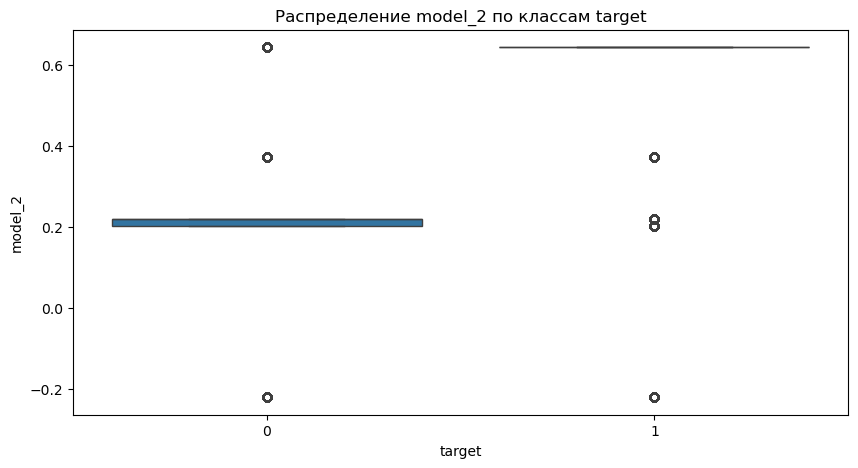

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=tr['target'], y=tr['model_2'])
plt.title("Распределение model_2 по классам target")
plt.show()

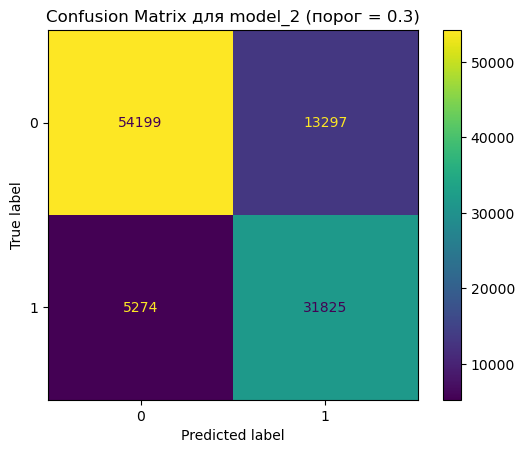

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Преобразование в бинарные значения
t = 0.3

y_pred = (tr['model_2'] > t).astype(int)

# Построение матрицы ошибок
cm = confusion_matrix(tr['target'], y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot()
plt.title(f'Confusion Matrix для model_2 (порог = {t})')
plt.show()

In [13]:
tst['model_2_round'] = (tst['model_2'] > 0.3).astype(int)

In [14]:
tst

,order_id,order_create_time,session_end_time,model_1,model_2,model_3,model_4,model_5,model_2_round
0,1350922,1976-02-05 15:08:37,1976-02-05 15:04:28.867,-1.710108,0.203183,0.040015,1,0.442343,0
1,1354989,1976-02-07 15:26:00,1976-02-07 15:27:26.593,0.086020,0.220081,0.021101,1,0.191027,0
2,1352637,1976-02-06 11:43:58,1976-02-05 18:34:59.477,-0.438741,0.644805,0.066312,0,0.400509,1
3,1350050,1976-02-05 11:26:19,1976-02-05 11:09:28.247,-1.395752,0.203183,0.083039,1,0.414590,0
4,1341733,1976-02-01 19:36:32,1976-02-01 09:53:54.103,-0.441443,0.644805,0.052902,0,0.411544,1
...,...,...,...,...,...,...,...,...,...
17191,1358397,1976-02-09 16:13:20,1976-02-02 09:02:14.140,-0.429658,0.644805,0.908250,0,0.196781,1
17192,1357968,1976-02-09 14:30:59,1976-02-09 14:26:24.480,-1.710108,0.203183,0.040665,0,0.411543,0
17193,1358835,1976-02-09 18:39:45,1976-02-09 18:30:36.407,0.086020,0.644805,0.039744,1,0.426308,1
17194,1365692,1976-02-12 17:50:18,1976-02-12 16:13:15.153,-1.710108,0.203183,0.041701,0,0.433750,0


In [15]:
tst[['order_id', 'model_2']].to_csv('model_2.csv', index=False)

In [16]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(tr['target'], (tr['model_2'] > 0.3).astype(int)) 
auc

0.8304177835191338